In [0]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (51.5 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Pr

     |████████████████████████████████| 2.8MB 2.6MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702072 sha256=0581a3fb7215d47ec15cdcf1d6342b52909aab4cb6c7f9c07c7ed6ca4022915c
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.2.post1
    Uninstalling pyproj-2.4.2.post1:
      Successfully uninstalled pyproj-2.4.2.post1


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                     title                                            size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ----  -------------------  -------------  
chrisfilo/to-bee-or-no-to-bee                           To bee or not to bee                              3GB  2020-02-04 22:55:31             87  
peijenlin/msl-m-rems-2-edr-v1.0                         MSL-M-REMS-2-EDR-V1.0                            11GB  2020-02-05 00:55:52              6  
timoboz/tesla-stock-data-from-2010-to-2020              Tesla stock data from 2010 to 2020               46KB  2020-02-04 17:15:32            300  
devvret/congressional-voting-records                    Congressional Voting Records                      5KB  2020-02-04 21:33:27             38  
chrisfilo/fruit-recognition                             Fruit Recognition                                 8GB  2

In [0]:
!kaggle datasets download -d usdot/flight-delays

 99% 188M/191M [00:08<00:00, 23.7MB/s]
100% 191M/191M [00:08<00:00, 24.1MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!unzip \*.zip

Archive:  flight-delays.zip
  inflating: airlines.csv            
  inflating: airports.csv            
  inflating: flights.csv             


In [0]:
!ls

airlines.csv  flight-delays.zip  kaggle.json
airports.csv  flights.csv	 sample_data


In [0]:
!dir

airlines.csv  flight-delays.zip  kaggle.json
airports.csv  flights.csv	 sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
df = pd.read_csv('flights.csv', low_memory=False)
print('Dataframe dimensions', df.shape)

NameError: ignored

In [0]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum() / df.shape[0] * 100)).T.rename(index={0: 'null values (%)'})

In [0]:
tab_info

,column type,null values (nb),YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
null values (%),NaN,NaN,0,0,0,0,0,0,0.252978,0,0,0,1.48053,1.48053,1.53026,1.53026,0.000103109,1.80563,1.80563,0,1.58982,1.58982,0,1.58982,1.80563,0,0,98.4554,81.725,81.725,81.725,81.725,81.725
AIRLINE,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIRLINE_DELAY,float64,4755640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_SYSTEM_DELAY,float64,4755640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_TIME,float64,105071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARRIVAL_DELAY,float64,105071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARRIVAL_TIME,float64,92513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLATION_REASON,object,5729195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLED,int64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,int64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
airports = pd.read_csv('airports.csv')

In [0]:
flights = df

In [0]:
flights.head(50)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# count the number of flights
count_flights = flights['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))

# define the colors 
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']

# define size limits
size_limits = [1, 100, 1000, 10000, 100000, 1000000]

labels = []

for i in range(len(size_limits) - 1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i + 1]))

print(labels)

['1 <.< 100', '100 <.< 1000', '1000 <.< 10000', '10000 <.< 100000', '100000 <.< 1000000']


<Figure size 792x792 with 0 Axes>

IndexError: ignored

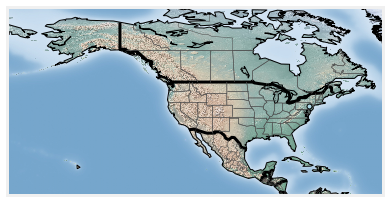

In [0]:
# creating the map
map_ = Basemap(resolution='c', llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)
map_.shadedrelief()
map_.drawcoastlines()
map_.drawcountries(linewidth=3)
map_.drawstates(color='0.3')

for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map_(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map_.plot(x, y, marker='o', markersize=index  + 5, markeredgewidth=1, color = colors[ind], markeredgecolor='k', label=labels[ind])
    
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
            '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()

for key in key_order:
    new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 1, prop={size: 11},
               title='Number of flights per year', frameon=True, framealpha=1)
plt.show()

In [0]:
# considering only one month for initial_analysis
flights_Jan = flights[flights['MONTH'] == 1]

In [0]:
flights_Jan.shape

(469968, 31)

## Data Cleaning
___

1. Conversion of Year, Month and Day columns to a single date
2. Conversion of the departure and arrival time variables into actual datetime variables
3. Removing all the redundant columns thus found
    * scheduled departure + delay are the only necessary columns
    * scheduled arrival + delay are the only necessary columns
4. Thinking about all the other categorical variables - encoding them

In [0]:
flights['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
flights.drop(['YEAR', 'MONTH', 'DAY'], axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [0]:
# conversion of arrival and departure times
# function to convert 'hhmm' string to datetime.time

def string_to_time(time_string):
    if pd.isnull(time_string):
        return np.nan
    else:
        if time_string == 2400:
            time_string  = 0
        time_string = "{0:04d}".format(int(time_string))
        time_ = datetime.time(int(time_string[0:2]), int(time_string[2:4]))
        return time_

# function to combine date and time to produce a datetime.datetime

def combine_date_time(date_time):
    if pd.isnull(date_time[0] or date_time[1]):
        return np.nan
    else:
        return datetime.datetime.combine(date_time[0], date_time[1])
    
# function to combine two columns to create a datetime

def create_flight_time(df, column):
    list_ = []
    for index, columns in df[['DATE', column]].iterrows():
        if pd.isnull(columns[1]):
            return np.nan
        elif float(columns[1] == 2400):
            columns[0] += datetime.timedelta(days=1)
            columns[1] = datetime.time(0, 0)
            list_.append(combine_date_time(columns))
        else:
            columns[1] = string_to_time(columns[1])
            list_.append(combine_date_time(columns))
    return pd.Series(list_)

In [0]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(string_to_time)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(string_to_time)
flights['ARRIVAL_TIME'] =  flights['ARRIVAL_TIME'].apply(string_to_time)

flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,2015-01-01 00:25:00,00:20:00,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,06:02:00,06:10:00,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,2015-01-01 00:25:00,00:19:00,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,05:26:00,05:09:00,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,2015-01-01 00:30:00,00:44:00,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,08:03:00,07:53:00,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,2015-01-01 00:30:00,00:19:00,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,05:45:00,05:32:00,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,2015-01-01 00:30:00,00:33:00,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,07:11:00,06:56:00,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


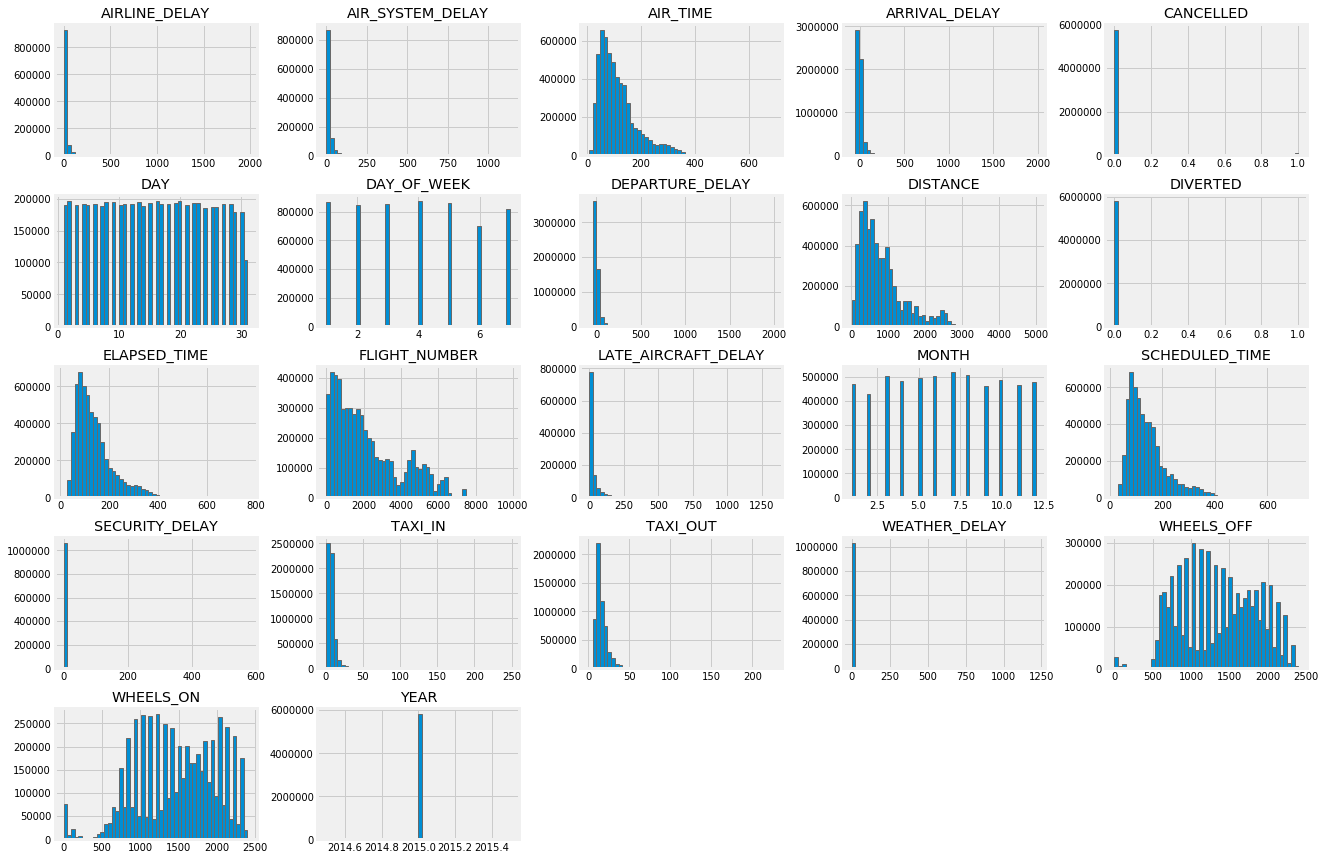

In [0]:
# since the departure time and arrival time don't provide any additional
# information, these can be considered redundant, and hence, we're not going
# to use these

# let's now make the list of variables that don't show any sort of dependency
# and remove those

# let's create a histogram for each of these variables so that their dependency 
# is shown
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [0]:
# checking how complete the dataset actually is
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)'] = (flights.shape[0] - missing_df['missing values']) / flights.shape[0] * 100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,1.544643
1,LATE_AIRCRAFT_DELAY,4755640,18.275040
2,AIRLINE_DELAY,4755640,18.275040
3,SECURITY_DELAY,4755640,18.275040
4,AIR_SYSTEM_DELAY,4755640,18.275040
5,WEATHER_DELAY,4755640,18.275040
6,ELAPSED_TIME,105071,98.194371
7,AIR_TIME,105071,98.194371
8,ARRIVAL_DELAY,105071,98.194371
9,WHEELS_ON,92513,98.410178


In [0]:
# by checking the last completeness and dependencies of the data set we have
# reached at a point where we can remove all the redundant features
# as well as those features that don't contribute much to the model

# removing all those features with filling factors < 20% initially
low_filling_features = ['CANCELLATION_REASON', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY',
                       'SECURITY_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY']
# weather is actually an important feature, but due to lack of data
# we're removing it

# remove low filling features
flights.drop(low_filling_features, axis=1, inplace=True)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01


In [0]:
flights.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)
flights.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01
2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01


In [0]:
flights.shape

(5819079, 23)

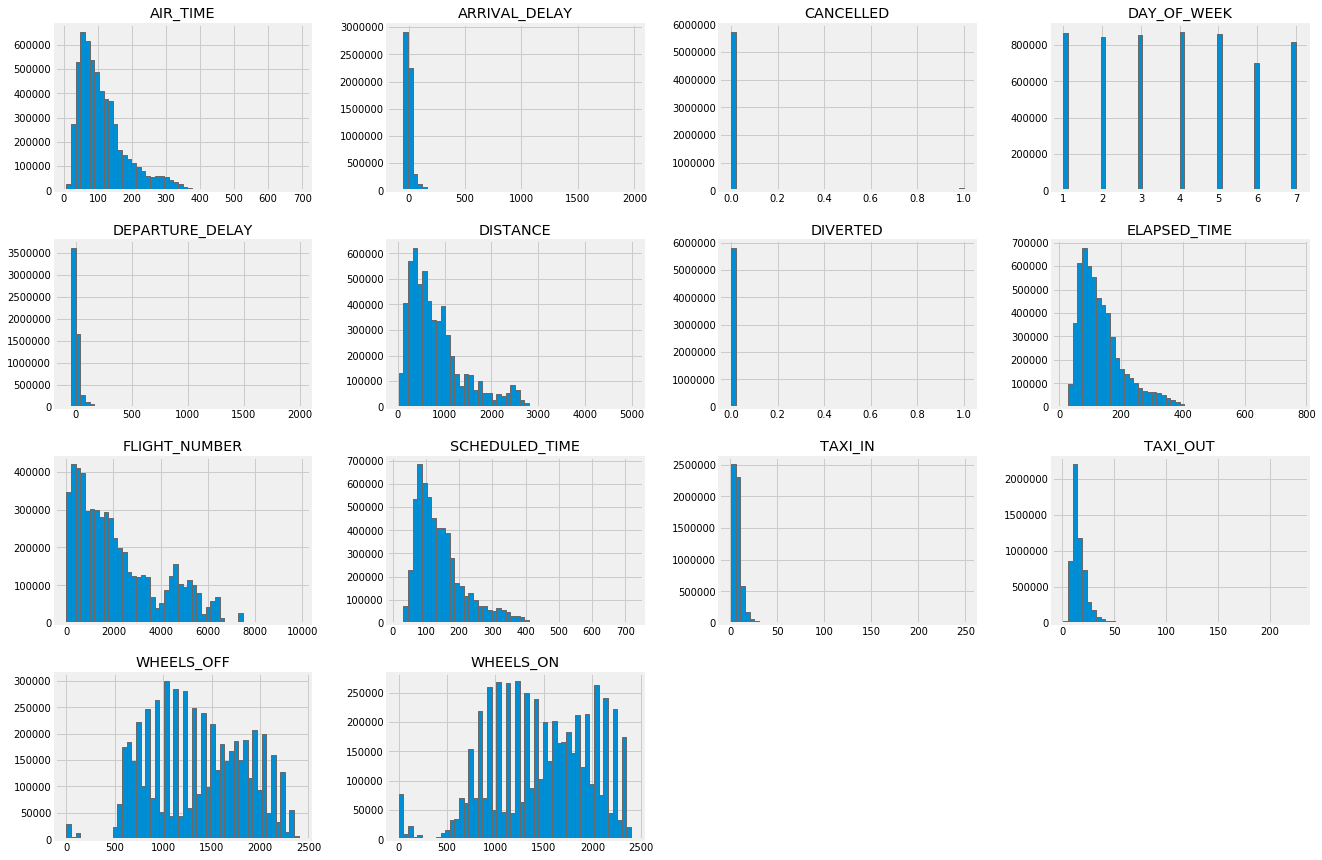

In [0]:
# now plotting the histogram
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [0]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 23 columns):
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
DATE                   datetime64[ns]
dtypes: datetime64[ns](2), float64(9), int64(5), object(7)
memory usage: 1021.1+ MB


In [0]:
# now let's do a bit of documentation
"""
  AIRLINE  - it is an object which is the airline identifier
  WHEELS_OFF - the time point at which the aircraft's wheel leaves the ground
  WHEELS_ON - the time point at which the aircraft's wheel touches the ground

  TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off
  TAXI_IN - The time duration elapsed between wheels-on and gate arrival at the destination airport

  AIR_TIME - The time duration between wheels off and wheels on
  ELAPSED TIME - AIR_TIME + TAXI_IN + TAXI_OUT

"""

## Inference
___

From the inference of the dataset we found that the elapsed time and air time features, are not consistent with respect to the airlines' arrival and departure. Hence, I think that the air time feature is inconsistent and hence is the elapsed time variable, hence, they either should be redefined or they should be removed altogether.

In [0]:
# let's redefine elapsed time as arrival time - departure time
# first let's drop the air time and elapsed time variables
flights.drop(['ELAPSED_TIME', 'AIR_TIME'], axis=1, inplace=True)
flights.head()

NameError: ignored

In [0]:
# let's now redefine the new column
# making the elapsed time in minutes
flights['ELAPSED_TIME'] = flights.apply(lambda row: (row.ARRIVAL_TIME - row.DEPARTURE_TIME).days * 24 * 60 + (row.ARRIVAL_TIME - row.DEPARTURE_TIME).seconds / 60)
flights.head()

NameError: ignored

In [0]:
type(flights['ARRIVAL_TIME'][0])

datetime.time